In [209]:
import numpy as np
import matplotlib.pyplot as plt

In [210]:
def dist(point1,point2):
    return np.sum((point1-point2)**2)
def assign_centroid(point,centroids,k):
    d = dist(point,centroids[:,0])
    ind = 0
    for i in range(1,k):
        temp_d = dist(point,centroids[:,i])
        if d > temp_d:
            d = temp_d
            ind = i
    return ind, d
def k_menas(points,k):
    p_size = points.shape[1]
    mu = np.mean(points,axis=1).reshape([2,-1])
    std = np.std(points,axis=1).reshape([2,-1])
    centroids = (2*np.random.rand(2,k)-1)*2*std + mu
    plt.scatter(points[0,:],points[1,:],label='Points')
    plt.scatter(centroids[0,:],centroids[1,:],label='Initial Centroids')
    old_total_cost = 0
    total_cost = 0
    while(1):
        new_centroids = np.zeros((2,k))
        cnt = np.zeros((2,k))
        old_total_cost = total_cost
        total_cost = 0
        for i in range(p_size):
            ind,cost = assign_centroid(points[:,i],centroids,k)
            new_centroids[:,ind] += points[:,i]
            cnt[:,ind] += 1
            total_cost += cost
        centroids = new_centroids / cnt
        print(total_cost)
        if np.abs(old_total_cost-total_cost) < 0.001:
            break
        if total_cost-old_total_cost > 0 and old_total_cost!=0:
            print("Error")
    plt.scatter(centroids[0,:],centroids[1,:],label='Final Centroids')
    plt.legend()
    return centroids

51.26354597110444
32.57261617429435
30.247917348665002
28.926075826492276
28.63835380532057
28.49154042967545
28.310309132411966
28.28474330323964
28.28474330323964


array([[-1.39776552, -0.32027738, -0.76889313, -1.75664968,  0.38697609,
        -0.5689919 ,  1.27307432, -0.60304972,  0.91317766, -1.25901485],
       [ 0.2130611 , -1.75746645,  0.59130215, -0.84871448, -0.04490855,
         1.54575321, -0.97642258, -0.15748625,  1.19308649,  1.93755005]])

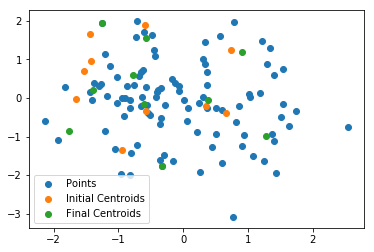

In [211]:
k_menas(np.random.randn(2,100),10)